# 1. Vector Space Model of Word Meaning

The goal of this problem set is to make you familiar with vector space model of word meaning. You may reuse some of functions you coded in Assignment 1. 

### Warning: This assignment may take substantial time to run if you are not optimizing your code. Make sure you have plenty of time to run if you are new to programming.

Go to https://drive.google.com/drive/folders/1Pe6D713L9S0GWwb_XzeLXAeNZOrBqZaN?usp=sharing and click add shortcut to drive. This will add the data required for this problem set to your Google drive.

<img src="https://drive.google.com/uc?id=1LqHisiziX8Ri94Xs6Cv8mhx6vivFM3kS" alt="Drawing" height="300"/>

Caution: Since this is real language on Twitter and deals with current events, some of it could be disturbing. In the later section of the course, we will deal with ethics and what is appropriate and what is not. 



Run the below code snippet. It will generate a URL which generates an authorization code.* Enter it below to give Colab access to your Google drive. 

*Copy function may not work. If so, manually copy the authorization code.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


When you run the `ls` command below, you should see the files in the tweets folder.




In [ ]:
!ls "/content/drive/My Drive/tweets"

20000_tweets.jsonl
20000_tweets.txt
covid-tweets-2020-08-10-2020-08-21.tokenized.txt
covid-tweets-2020-08-10-2020-08-21.trigrams.txt
GoogleNews-vectors-negative300.bin.gz
stop_words.txt


In [ ]:
# let's read tweets. These tweets are already tokenized and cleaned (Assignment 1)
tweets = open("/content/drive/My Drive/tweets/covid-tweets-2020-08-10-2020-08-21.tokenized.txt", "r").read().split("\n")
tweets = [tweet.split() for tweet in tweets]

print(len(tweets))



312878


## Problem 1.1: Word space model

Compute the most important context words of `ventilator`. Use Pointwise Mutual Information (PMI) to rank the context words (Refer to Lecture 4).

We define context as up to 3 words to the left and 3 words to the right. Ignore stop words and words that do not start with [a-z#]. Also ignore words that are not in the top 1000 frequent words.

These context words define the dimensions of the vector space model. Represent each word as a vector (dictionary/counter) of context words with PMI as the importance of the context word. Print the top 20 context words for each.

This is the sample output I got for `ventilator`. Your numbers need not match mine but the ranked list should look close to what I have.

```
[('put', 18.280538283196606), ('wearing', 17.587373569812726), ('even', 17.58651933524197), ('like', 17.402738298715878), ('covid', 17.172590097063086), ('patients', 16.894419647496004), ('use', 16.894298589380956), ('die', 16.89426559608771), ('days', 16.89415252713107), ('needed', 16.489137134110106), ('month', 16.48907033839664), ('weeks', 16.488913820220848), ('away', 16.48879303327717), ('week', 16.488739054051933), ('person', 16.488678720881293), ('good', 16.488160838026904), ('deaths', 16.487822204799755), ('go', 16.487564042558112), ('would', 16.48707075078768), ('one', 16.48706217686235), ('get', 16.486565870239033)]
```



Let's first load stop words.

In [ ]:
stop_words = set()
def load_stop_words():
  words = open("/content/drive/My Drive/tweets/stop_words.txt", "r").read().split("\n")
  for word in words:
    stop_words.add(word.strip())

load_stop_words()
print(len(stop_words))

134


Let's build the word vectors

In [ ]:
import torch.nn as nn
import torch
random1=torch.rand(3,3,3)
max=torch.max(random1, 1)
print(random1)
max.values

In [ ]:
import re
import math
from collections import Counter 
import itertools
from itertools import islice

#pattern1= re.compile('^[^a-z#]')
pattern2= re.compile('^[a-z]*’[a-z]{0,1}')
pattern3= re.compile('^[a-z]*\'[a-z]{0,1}')
pattern4= re.compile('\d{1,}')
#pattern5= re.compile('[’”“‘]')
pattern6= re.compile('^[a-z#]{2,}')
corpus=[]#Duplicate a new corpus
corpus=[[word for word in tweet if word not in stop_words] for tweet in tweets]
corpus=[[word for word in tweet if word in re.findall(pattern6,word)] for tweet in corpus]
corpus=[[word for word in tweet if word not in re.findall(pattern2,word)] for tweet in corpus]
corpus=[[word for word in tweet if word not in re.findall(pattern3,word)] for tweet in corpus]
corpus=[[word for word in tweet if word not in re.findall(pattern4,word)] for tweet in corpus]
#corpus=[[word for word in tweet if word not in re.findall(pattern5,word)] for tweet in corpus]
merge=list(itertools.chain.from_iterable(corpus))
tweets_count=list(itertools.chain.from_iterable(tweets))
count=Counter(merge)
total_count=len(tweets_count)
def cofreq2(word1,word2,cop):
    cofreq=0
    for tweet in cop:
      for word in tweet:
        if word==word1 and word2 in tweet: #Check the index of word1 
          pos1=tweet.index(word1) - 3
          pos2=tweet.index(word1) + 3
          if tweet.index(word2) in range(pos1,pos2): #If the word 2 is in range, cofreq+=1
            cofreq+=1
    if cofreq==0:
      return 1 #Prevent non-type error
    else:
      return cofreq
def PMI(word1, word2):
  # You have to store frequencies of individual words and (word, context word) 
  # pairs to compute this. You can compute them beforehand in order to avoid 
  # counting every time when this function is called.
  # Write your code
  freq_word1=count[word1]#Find unigrams
  freq_word2=count[word2]
  cofreq=0
  cofreq+=cofreq2(word1,word2,corpus)             
  return math.log2((cofreq*total_count)/(freq_word1*freq_word2)) 
    
def build_word_vector(word):
  # Write your code
  vocab=[word for word, word_count in count.most_common(1000)]
  word_vector=[]
  word_vector=[tuple((cword,PMI(word,cword))) for cword in vocab]
  sorted_vec=sorted(word_vector, key=lambda x: x[1], reverse=True)
  return sorted_vec


def print_top_dimensions(word_vector, n):
  # print top n dimensions sorted in the order of importance.
    for i in range(0,n):
      print(word_vector[i])
 
v1 = build_word_vector('ventilator')
print_top_dimensions(v1, 20) # print top 20 dimensions along with their weights



('patient', 8.208049670672274)
('hospital', 7.828532887744695)
('put', 7.70227502401739)
('patients', 7.260058509812107)
('spent', 7.216329148436841)
('end', 7.1998174369751755)
('enjoy', 7.163342866806889)
('tried', 7.143470720095273)
('brain', 6.990086773972683)
('critical', 6.930980156715512)
('needed', 6.817994527950766)
('month', 6.797663529665058)
('wo', 6.7187213773813586)
('weeks', 6.6952663568812305)
('failure', 6.652977849729515)
('days', 6.649703779500786)
('beyond', 6.282158884700785)
('respect', 6.277819948976449)
('cnn', 6.277819948976449)
('trumps', 6.277819948976449)


In [ ]:
window=2
i=[1,2,3,4,5,6,7,8]
b=i[window:-window]
print(b)
mylist=[]
for num in b:
  ind=i.index(num)
  former=[i[number] for number in range(ind-window,ind)]
  after=[i[number] for number in range(ind+1,ind+window+1)]
  temp=former+after
  mylist.append(temp)
print([])

[3, 4, 5, 6]
[]


In [ ]:
indices=[1, 6, 7, 436, 2, 1, 176, 4, 3, 46, 8, 1, 6]
window_size=2
currents=indices[window_size:-window_size]
surroundings=[]
print(currents)
print(len(indices))
for i in range(window_size,len(indices)-window_size):
      former=[indices[f_number] for f_number in range(i-window_size,i)]
      after=[indices[a_number] for a_number in range(i+1,i+window_size+1)]
      temp=former+after
      surroundings.append(temp)
print(currents)
print(surroundings)

[7, 436, 2, 1, 176, 4, 3, 46, 8]
13
[7, 436, 2, 1, 176, 4, 3, 46, 8]
[[1, 6, 436, 2], [6, 7, 2, 1], [7, 436, 1, 176], [436, 2, 176, 4], [2, 1, 4, 3], [1, 176, 3, 46], [176, 4, 46, 8], [4, 3, 8, 1], [3, 46, 1, 6]]


In [ ]:
indi=[1, 6, 7, 436, 2, 1, 176, 4, 3, 46, 8, 1, 6]
for i in range(0,len(indi)):
  print(indi[i])

1
6
7
436
2
1
176
4
3
46
8
1
6


## Problem 1.2: Compute the word similarity between words using Cosine Similarity.

Compute cosine similarity between the following pair of words: 
```
('ventilator', 'covid-19')
('ventilator', 'lockdown')
('ventilator', 'mask')
('ventilator', 'ppe')
```

Outputs of my code are:
```
('ventilator', 'covid-19') 0.17076006036635358
('ventilator', 'lockdown') ...
('ventilator', 'mask') 0.19229601085517933
('ventilator', 'ppe') ...
```


In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
def cosine_similarity(vector1, vector2):
  # write your code
  vec1=[i[1] for i in vector1]
  vec2=[i[1] for i in vector2]
  arr1=np.array(vec1)
  arr2=np.array(vec2)
  result = dot(arr1, arr2)/(norm(arr1)*norm(arr2))
  return result 

ventilator = build_word_vector('ventilator')
covid19 = build_word_vector('covid-19')
lockdown = build_word_vector('lockdown')
mask = build_word_vector('mask')
ppe = build_word_vector('ppe')

print(('ventilator', 'covid-19'), cosine_similarity(ventilator, covid19))
print(('ventilator', 'lockdown'), cosine_similarity(ventilator, lockdown))
print(('ventilator', 'mask'), cosine_similarity(ventilator, mask))
print(('ventilator', 'ppe'), cosine_similarity(ventilator, ppe))


('ventilator', 'covid-19') 0.7351879330489419
('ventilator', 'lockdown') 0.8620622191430917
('ventilator', 'mask') 0.8806266225724617
('ventilator', 'ppe') 0.9271256269421272


## Problem 1.3: What can you tell about these words from the similarities?

1. `ventilator` when compared with `covid-19, lockdown, mask, ppe`
2. `pandemic` when compared with `covid-19, lockdown, mask, ppe`
3. `president` compared with `trump, biden`
4. `trudeau` compared with `trump, biden`


('ventilator', 'covid-19') 0.7351879330489419
('ventilator', 'lockdown') 0.8620622191430917
('ventilator', 'mask') 0.8806266225724617
('ventilator', 'ppe') 0.9271256269421272

1. All these words are related but ppe and mask has the largest cosine similarity value because they're all medical supplies while the other two are not.

2. pandemic is most similar to covid-19 because pandemic is caused by covid-19 and ppe is only one dimension of the covid. 

3 and 4. ('president', 'trump') 0.9950780835806367
('president', 'biden') 0.9975171466111247
('trudeau', 'trump') 0.9652466707198312
('trudeau', 'biden') 0.9520173225124738

When we're comparing President with Trump and Biden, the pair with Biden has higher cosine similarity is maybe because Biden is the current president thus the average PMI in Biden word vector is higher. Trudeau and Trump has higher cosine similarity than Trudeau and Biden is probabaly because Trump has been in office longer than Biden as the head of state so there's more information in common with the leader of Canada, Trudeau





In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
def cosine_similarity(vector1, vector2):
  # write your code
  vec1=[i[1] for i in vector1]
  vec2=[i[1] for i in vector2]
  arr1=np.array(vec1)
  arr2=np.array(vec2)
  result = dot(arr1, arr2)/(norm(arr1)*norm(arr2))
  return result 

president = build_word_vector('president')
trump = build_word_vector('trump')
biden = build_word_vector('biden')
trudeau = build_word_vector('trudeau')


print(('president', 'trump'), cosine_similarity(president, trump))
print(('president', 'biden'), cosine_similarity(president, biden))
print(('trudeau', 'trump'), cosine_similarity(trudeau, trump))
print(('trudeau', 'biden'), cosine_similarity(trudeau, biden))


('president', 'trump') 0.9950780835806367
('president', 'biden') 0.9975171466111247
('trudeau', 'trump') 0.9652466707198312
('trudeau', 'biden') 0.9520173225124738


# Let's play with word2vec

First let's load word2vec. I am using [gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html) but feel free to use any libraries or tools.

In [ ]:
indices=[1,2,3,4,5,6,7,8,9]
window_size=2
currents=indices[window_size:-window_size]
surrondings=[]
for num in currents:
    ind=indices.index(num)
    former=[indices[number] for number in range(ind-window_size,ind)]
    after=[indices[number] for number in range(ind+1,ind+window_size+1)]
    temp=former+after
    surrondings.append(temp)
print(surrondings)
print(currents)

[[1, 2, 4, 5], [2, 3, 5, 6], [3, 4, 6, 7], [4, 5, 7, 8], [5, 6, 8, 9]]
[3, 4, 5, 6, 7]


In [ ]:
listA=[]
listB=[1,2]
listA.extend(listB)
print(listA)

[1, 2]


In [ ]:
from gensim.models import KeyedVectors

EMBEDDING_FILE = '/content/drive/My Drive/tweets/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

FileNotFoundError: ignored

## Problem 1.4: Compute the top 5 similar words of `ventilator` using word2vec?

In [ ]:
# Write your code here
result = word2vec.most_similar(positive=['ventilator'], topn=5)
most_similar_key, similarity = result[0]  
print(f"{most_similar_key}: {similarity:.4f}")
most_similar_key, similarity = result[1]  
print(f"{most_similar_key}: {similarity:.4f}")
most_similar_key, similarity = result[2]  
print(f"{most_similar_key}: {similarity:.4f}")
most_similar_key, similarity = result[3]  
print(f"{most_similar_key}: {similarity:.4f}")
most_similar_key, similarity = result[4]  
print(f"{most_similar_key}: {similarity:.4f}")


respirator: 0.7865
mechanical_ventilator: 0.7064
intensive_care: 0.6810
ventilators: 0.6684
breathing_tube: 0.6666


# Problem 1.5: Word analogy

If I told you the plural of `car` is `cars`, can you automatically find the plural of `hypothesis` and `man` using word2vec.

Similarly, if I told you a newborn `dog` is called `puppy`, can you automatically find what are the newborn words of `cat` and `sheep` using word2vec?


In [ ]:
# Write your code here
def word_analogy(word1, word2, word3):
  result = word2vec.most_similar(positive=[word2, word3], negative=[word1])#Calculate the word vectors 
  most_similar_key, similarity = result[0]#The first element is the most similar word to the our input  
  return f"{most_similar_key}"
print(word_analogy('car','cars','hypothesis'))  
print(word_analogy('car','cars','man'))  
print(word_analogy('dog','puppy','cat'))
print(word_analogy('dog','puppy','sheep'))

NameError: ignored

# 2. Topic Models 

The goal of this part is to make you familiar with topic models. You may reuse some of functions you coded for the previous assignments.

## Data Download and Setup

Let us start by downloading the news section of the Brown corpus:

In [ ]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
documents = [brown.words(fileid) for fileid in brown.fileids()]


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Let us inspect some of the documents:

In [ ]:
print("The news section of the Brown corpus contains {} documents.".format(len(documents)))
for i in range(3):
  document = documents[i]
  print("Document {} has {} words: {}".format(i, len(document), document))

The news section of the Brown corpus contains 500 documents.
Document 0 has 2242 words: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
Document 1 has 2277 words: ['Austin', ',', 'Texas', '--', 'Committee', 'approval', ...]
Document 2 has 2275 words: ['Several', 'defendants', 'in', 'the', 'Summerdale', ...]


Finally, let us download a list of stopwords for later.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

## Problem 2.1: Document-Term Matrix

Create a document-term matrix with tf-idf. You should preprocess documents by: 1) lowercasing words, 2) excluding stopwords, and 3) including alphanumeric strings only.

```python
import numpy as np
import re 
pattern=re.compile('^[a-zA-Z0-9]*$')
documents=[[word.lower() for word in document] for document in documents]
documents=[[word for word not in stopwords_list] for document in documents]
documents=[[word for word not in re.findall(pattern,word)] for document in documents]



def create_tfidf_matrix(documents: List[List[str]]) -> (np.array, List[str]):
  # Args:
  #   documents: list of documents, each document being a list of words.
  # Outputs:
  #   tfidf_matrix: np.array of shape (num_documents, vocabulary_size)
  #   vocabulary: a list of terms corresponding to the columns of the matrix.

tfidf_matrix, vocabulary = create_tfidf_matrix(documents)
```

How sparse is this matrix? Calculate the ratio between cells with value 0 and the total number of cells. 


In [ ]:
import re
pattern=re.compile('^[a-zA-Z0-9]*$')
pattern1= re.compile('\d{1,}')
documents=[[word.lower() for word in document] for document in documents]
documents=[[word for word in document if word not in stopwords_list] for document in documents]
documents=[[word for word in document if word in re.findall(pattern,word)] for document in documents]
documents=[[word for word in document if word not in re.findall(pattern1,word)] for document in documents]

In [ ]:
import numpy as np
import re 
from collections import Counter
from typing import List
import itertools
from itertools import chain
pattern=re.compile('^[a-zA-Z0-9]*$')
pattern1= re.compile('\d{1,}')
documents=[[word.lower() for word in document] for document in documents]
documents=[[word for word in document if word not in stopwords_list] for document in documents]
documents=[[word for word in document if word in re.findall(pattern,word)] for document in documents]
documents=[[word for word in document if word not in re.findall(pattern1,word)] for document in documents]
corpus=list(itertools.chain.from_iterable(documents))
vocab=[s for x in documents for s in set(x)]
wordoc_count=Counter(vocab)
unique_words=list(set(corpus))
word_freq=Counter(corpus)
def tfval(document):
  word_tf_values = {}
  doc_freq = Counter(document) #occurences for words in a single document
  for k,v in doc_freq.items(): 
    word_tf = v/len(document) #calculate the tf value
    word_tf_values[k] = word_tf
  return word_tf_values  #Dict of tf in a document
def idfval(docs):              
  word_idf_values = {}
  for k,v in wordoc_count.items(): #Count of words in the corpus as key
    word_idf_values[k] = np.log(len(documents)/v) #Calculate idf 
  return word_idf_values #Dict of idf in a document

def create_tfidf_matrix(documents: List[List[str]]) -> (np.array, List[str]):
  # Args:
  #   documents: list of documents, each document being a list of words.
  # Outputs:
  #   tfidf_matrix: np.array of shape (num_documents, vocabulary_size)
  #   vocabulary: a list of terms corresponding to the columns of the matrix.
  nrow=len(documents)
  ncolumn=len(unique_words)
  mat=np.zeros((nrow,ncolumn))
  idf=idfval(documents)
  zero_counter=0
  for i in range(0,ncolumn-1):
    for j in range(0,nrow-1):
      mat[j,i]=idf[unique_words[i]]
  for i in range(0,ncolumn-1):
    for j in range(0,nrow-1):
      if unique_words[i] in documents[j]:
        tf=tfval(documents[j])
        mat[j,i]=mat[j,i]*tf[unique_words[i]]
      else: 
        mat[j,i]=0
        zero_counter+=1
  sparsity=zero_counter/(nrow*ncolumn)
  print("Sparsity: {}".format(sparsity))
  return mat,unique_words

  

tfidf_matrix, vocabulary = create_tfidf_matrix(documents)

Sparsity: 0.9824832698957634


## Problem 2.2: Latent Semantic Analysis

We perform LSA to obtain document embeddings `U` and term embeddings `VT`.

```python
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(tfidf_matrix, 
                              n_components=10,
                              n_iter=100,
                              random_state=42)
```

Define a function to find the 5 most relevant terms for each of the 10 latent dimensions (tip: you should make use of VT and the vocabulary).

```python
def extract_salient_words(VT: np.array, 
                  vocabulary: List[str]
                  ) -> salient_words: dict[int, List[str]]:
  # Args:
  #  VT: a numpy array of size (n_components, vocabulary_size)
  #  vocabulary: a list of words of size vocabulary_size
  # Outputs:
  #  salient_words: a dictionary with the latent dimension indices as keys and a list of its 5 most salient words as values

salient_words = extract_salient_words(VT, vocabulary)

for key, value in salient_words:
  print("Concept {}: {}".format(str(key), " ".join(value)))
```

In [ ]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(tfidf_matrix, 
                              n_components=20,
                              n_iter=100,
                              random_state=42)


In [ ]:
#import numpy as np
from typing import List
from typing import Dict
def extract_salient_words(VT: np.array, 
                  vocabulary: List[str],
                  ):
  # Args:
  #  VT: a numpy array of size (n_components, vocabulary_size)
  #  vocabulary: a list of words of size vocabulary_size
  # Outputs:
  #  salient_words: a dictionary with the latent dimension indices as keys and a list of its 5 most salient words as values
  salient_words={}
  for i in range(0,10):
    list_word=[]
    indices = (-VT[i]).argsort()[:5]#
    for index in indices:
      list_word.append(unique_words[index])
    key=i
    salient_words[key]=list_word
  return salient_words

salient_words = extract_salient_words(VT, vocabulary)

for key, value in salient_words.items():
  print("Concept {}: {}".format(str(key), " ".join(value)))

Concept 0: af polynomial operator theorem q
Concept 1: af polynomial operator theorem diagonalizable
Concept 2: anode holder arc temperature plug
Concept 3: phil anode mike deegan jess
Concept 4: staining nonspecific clover sections wtv
Concept 5: dictionary text cell platform information
Concept 6: platform gyro accelerometer leveling axis
Concept 7: q tangent secants c curve
Concept 8: feed phil milligrams cattle grams
Concept 9: phil mike deegan eddie anniston


## Problem 2.3: Document Retrieval

Given a text query, view this as a mini document, and compare it to your documents in the low-dimensional space.

First, we need to create a vector $\mathbf{d}$, which is the tf-idf representation of the query. Then we project it into the semantic space with the linear map $\Sigma^{-1} V^\top$ learned above. This gives us a pseudo-document embedding $\hat{\mathbf{d}}$.

$$\hat{\mathbf{d}} = \Sigma^{-1} V^\top \mathbf{d}$$

Then, you will need to implement a function to calculate the cosine similarity between this embedded query and all the document embeddings.

Retrieve the indices of the top-3 documents with the highest cosine similarity with the following queries:


```python
query1 = ['T.', 'V.', 'Barker', 'developed', 'the', 'classification-angle', 'system']
query2 = ['imitation', 'vs.', 'formalism', 'in', 'philosophical', 'debates']
query3 = ['Krim', 'attended', 'the', 'University', 'of', 'North', 'Carolina', 'to', 'follow', 'Thomas', 'Wolfe']
```



In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
from operator import itemgetter
query1 = ['T.', 'V.', 'Barker', 'developed', 'the', 'classification-angle', 'system']
query2 = ['imitation', 'vs.', 'formalism', 'in', 'philosophical', 'debates']
query3 = ['Krim', 'attended', 'the', 'University', 'of', 'North', 'Carolina', 'to', 'follow', 'Thomas', 'Wolfe']

idf=idfval(documents)
def tfidfvec2(query):
  query=[word.lower() for word in query]
  query=[word for word in query if word not in stopwords_list]
  unique=list(set(query))
  word_c=Counter(query)
  unique=list(set(query))
  ncolumn=len(unique)
  mat=[]
  dic={}
  tf=tfval(query)
  for word in query:
    tf=tfval(query)
    if word not in idf.keys():
      dic[word]=0
    else:
      dic[word]=tf[word]*idf[word]
  return dic
           

def cosine_embedding(query,document):
  docscore=0
  tfdoc={}
  numerator=0
  vecquery=[]
  vecdoc=[]

  for word in document:
      tfdoc=tfval(document)
      tfidf=tfidfvec2(query)
      docscore=tfdoc[word]*idf[word]
      vecdoc.append(tuple((word,docscore)))
      if word in query:
        queryWordScore = tfidf[word]   
        vecquery.append(tuple((word,queryWordScore)))
      else:
        vecquery.append(tuple((word,0)))

  vecquery=[i[1] for i in vecquery]
  vecdoc=[i[1] for i in vecdoc]
  arr1=np.array(vecquery)
  arr2=np.array(vecdoc)
  if dot(arr1,arr2)!=0 and (norm(arr1)*norm(arr2))!=0:
    result = dot(arr1, arr2)/(norm(arr1)*norm(arr2))
  else:
    result=0
  return result

def calculate_cosine(query):
  cosine={}
  for document in documents:
      cosine[documents.index(document)]=cosine_embedding(query,document)
  res = dict(sorted(cosine.items(), key = itemgetter(1), reverse = True)[:3])
  return res
print(calculate_cosine(query1))
print(calculate_cosine(query2))
print(calculate_cosine(query3))

{318: 0.26151359547699154, 43: 0.20450920257641628, 137: 0.17101291633164023}
{204: 0.4379294938807412, 244: 0.20250985822362316, 57: 0.06022114785186182}
{70: 0.032977641298781925, 16: 0.03169558941804979, 197: 0.029062905706194967}


## Problem 2.4: Document Clustering

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

num_clusters = 10
km = KMeans(n_clusters=num_clusters)
document_embeddings = U * Sigma
km.fit(document_embeddings)
clusters = km.labels_.tolist()
print(clusters)
```

Let us now plot the document embeddings and their clusters:

```python
import umap
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=42).fit_transform(document_embeddings)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, s=20, edgecolor='none')
plt.show()
```

What are the differences you observe by using a different number of `n_components` in LSA or `n_clusters` in K-Means?

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

num_clusters = 10
km = KMeans(n_clusters=num_clusters)
document_embeddings = U * Sigma
km.fit(document_embeddings)
clusters = km.labels_.tolist()
print(clusters)

[3, 3, 19, 3, 3, 3, 3, 19, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 19, 3, 19, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 19, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 4, 17, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 11, 19, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 19, 3, 3, 19, 19, 19, 19, 3, 19, 19, 4, 19, 3, 19, 3, 19, 19, 3, 3, 19, 19, 19, 7, 19, 3, 3, 19, 3, 19, 3, 4, 9, 4, 4, 3, 4, 4, 3, 4, 3, 3, 15, 3, 14, 3, 6, 3, 1, 8, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

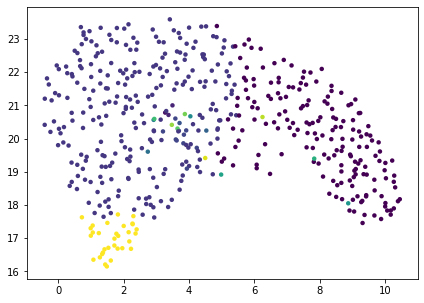

In [ ]:

import umap
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=42).fit_transform(document_embeddings)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, s=20, edgecolor='none')
plt.show()

When we keep the n_components constant and change the n_clusters from 10 to 20 we found the colour distribution in the clustering changed. Then I kept n_clusters constant(=10) and change n_components from 10 to 20, the shape of the clustering changed. Finally, I tried n_clusters=n_components=20. This time we obeserved the change in colour too.  

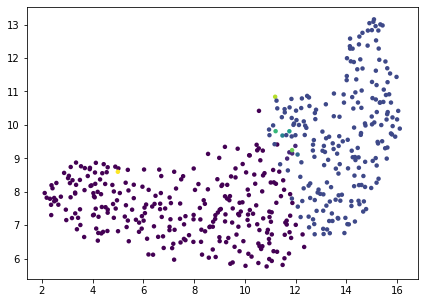
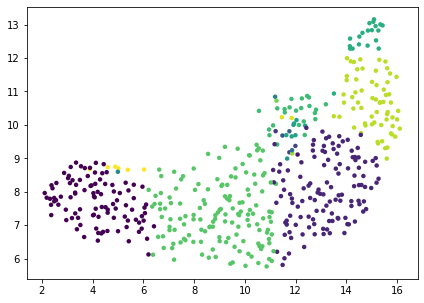
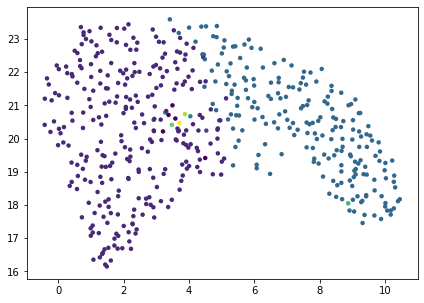
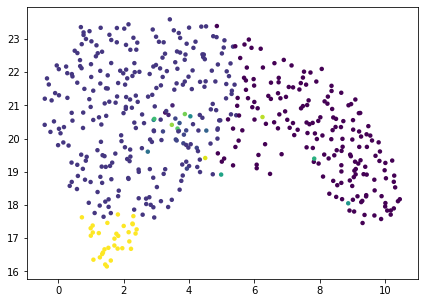